In [40]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import tensorflow.keras as keras
keras.__version__
from keras.regularizers import l2

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os
import zipfile

local_zip = '/content/drive/MyDrive/horse-or-human_dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [18]:
base_dir = '/tmp/horse-or-human_dataset'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

# Directory with our training horses pictures
train_horses_dir = os.path.join(train_dir, 'horses')
# Directory with our training humans pictures
train_humans_dir = os.path.join(train_dir, 'humans')

# Directory with our test horses pictures
val_horses_dir = os.path.join(test_dir, 'horses')
# Directory with our test humans pictures
val_humans_dir = os.path.join(test_dir, 'humans')

In [45]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow test images in batches of 20 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=51,  # 1027 images = batch_size * steps
      epochs=10,
      validation_data=test_generator,
      validation_steps=12)

Epoch 1/10
51/51 [==============================] - 50s 963ms/step - loss: 0.7148 - acc: 0.5195 - val_loss: 0.6777 - val_acc: 0.5125
Epoch 2/10
51/51 [==============================] - 49s 954ms/step - loss: 0.6769 - acc: 0.6474 - val_loss: 0.5496 - val_acc: 0.6833
Epoch 3/10
51/51 [==============================] - 50s 971ms/step - loss: 0.5550 - acc: 0.7397 - val_loss: 0.5718 - val_acc: 0.7000
Epoch 4/10
51/51 [==============================] - 50s 976ms/step - loss: 0.5347 - acc: 0.7510 - val_loss: 0.8655 - val_acc: 0.6083
Epoch 5/10
51/51 [==============================] - 50s 974ms/step - loss: 0.4822 - acc: 0.7791 - val_loss: 1.4875 - val_acc: 0.5542
Epoch 6/10
51/51 [==============================] - 50s 983ms/step - loss: 0.4206 - acc: 0.8189 - val_loss: 1.7617 - val_acc: 0.5333
Epoch 7/10
51/51 [==============================] - 50s 971ms/step - loss: 0.4204 - acc: 0.8276 - val_loss: 1.5570 - val_acc: 0.5708
Epoch 8/10
51/51 [==============================] - 50s 984ms/step - 

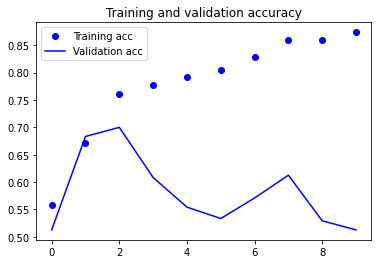

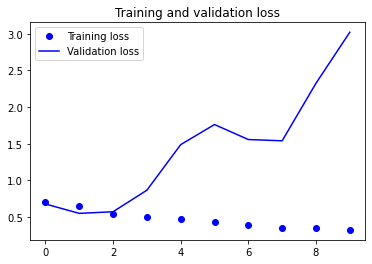

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()